<a href="https://colab.research.google.com/github/Mario-U-KY/DataScience/blob/main/2_4_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>2.4 Calculus</h1>

<h2> 2.4.1 Derivatives and Differentiation</h2>

In [2]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
  return 3*x**2 - 4*x

3x^2 -4x 라는 함수에 대해 h의 값을 계속 감소시켜 미분한 결과는 아래와 같다.

In [3]:
def numerical_lim(f,x,h):
  return (f(x+h)-f(x))/h
h=0.1
for i in range(5):
  print(f'h={h:.5f}, numerical limit={numerical_lim(f,1,h):.5f}')
  h *= 0.1


h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


미분 과정 시각화하기

In [7]:
#@save
def use_svg_display(): 
  """Use the svg format to display a plot in Jupyter."""
  backend_inline.set_matplotlib_formats('svg')

In [6]:
#@save
def set_figsize(figsize=(3.5, 2.5)): 
  """set the figure size for the matplotlib."""
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize


In [12]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
  """Set the axes for matplotlib."""
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel)
  axes.set_xscale(xscale)
  axes.set_yscale(yscale)
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  if legend:
    axes.legend(legend)
  axes.grid()


In [13]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

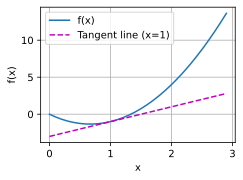

In [14]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

<h2>2.4.2~3 Partial Derivatives and Gradients</h2>


multivariate functions에서 편미분하기<br>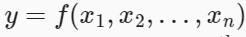
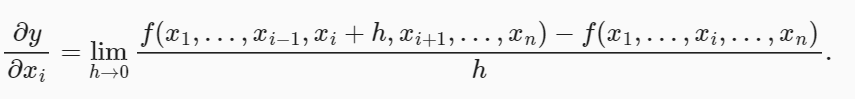

함수의 편미분들을 concatenate하면 gradient vector를 얻을 수 있다. 
f(x)의 x에 대한 gradient값은 아래와 같다.<br>
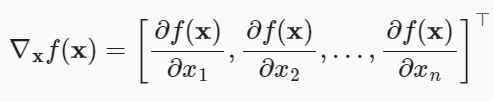

<h2>2.4.4 Chain Rule</h2>

Gradients는 찾기 어려운 경우가 많음, 딥러닝에서의 다변량 함수는 대부분 복잡한 경우가 많기 때문에 이러한 rules로 미분이 불가능한 경우가 많다. 하지만 chain rule 을 사용한다면 복잡한 함수의 미분이 가능해진다. <br>
아래는 기본적인 chain rule, 그리고 일반화한 chain rule의 형태이다.<br>
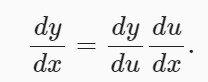
<br>
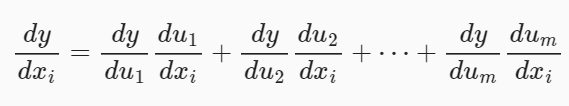